# Projet : Prédiction de la consommation énergétique

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Étape 1 : Analyse descriptive des données

Nous commençons par une analyse descriptive du dataset afin de bien comprendre les caractéristiques des données avant toute modélisation.

Les étapes de cette analyse sont les suivantes :

1. **Chargement des données**  
   Importer le fichier CSV contenant les observations à l'aide de la librairie `pandas`.

2. **Aperçu global des données**  
   Visualiser les premières lignes du dataset avec la fonction `head()` afin d'observer la structure des variables.

3. **Analyse des valeurs manquantes**  
   Vérifier s'il existe des valeurs manquantes à l'aide de la méthode `isnull().sum()`.

4. **Statistiques descriptives**  
   Utiliser la méthode `describe()` pour obtenir des informations clés sur chaque variable :
   - Moyenne, médiane, minimum, maximum
   - Écart-type, quartiles
   Cela permet d'identifier d'éventuelles anomalies ou des variables peu informatives.

5. **Vérification des corrélations**  
   Calculer la matrice de corrélation avec la méthode `corr()` afin de détecter les relations linéaires entre les variables, en particulier entre les variables explicatives et la variable cible.

---

Cette étape est essentielle pour orienter correctement le choix des modèles et des traitements ultérieurs.

In [4]:
# Chargement des données
df = pd.read_csv('energydata_complete.csv')

In [5]:
# Aperçu des 5 premières lignes
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
# Infos sur les types de colonnes et les valeurs manquantes
print("\nInformations sur le dataset :")
df.info()


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19

In [7]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
df.describe()


Statistiques descriptives :


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
# Vérifions s'il y a des valeurs manquantes
print("\nValeurs manquantes :")
df.isnull().sum()


Valeurs manquantes :


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Analyse Descriptive

- Le dataset contient 19735 observations.
- La variable cible **Appliances** a une moyenne d'environ 97.7 kWh, avec un maximum à 1080 kWh.
- Les variables de température (T1 à T9, T_out) varient entre 15°C et 26°C.
- Pas de valeurs manquantes détectées.
- Les colonnes `rv1` et `rv2` semblent peu informatives (même distribution).

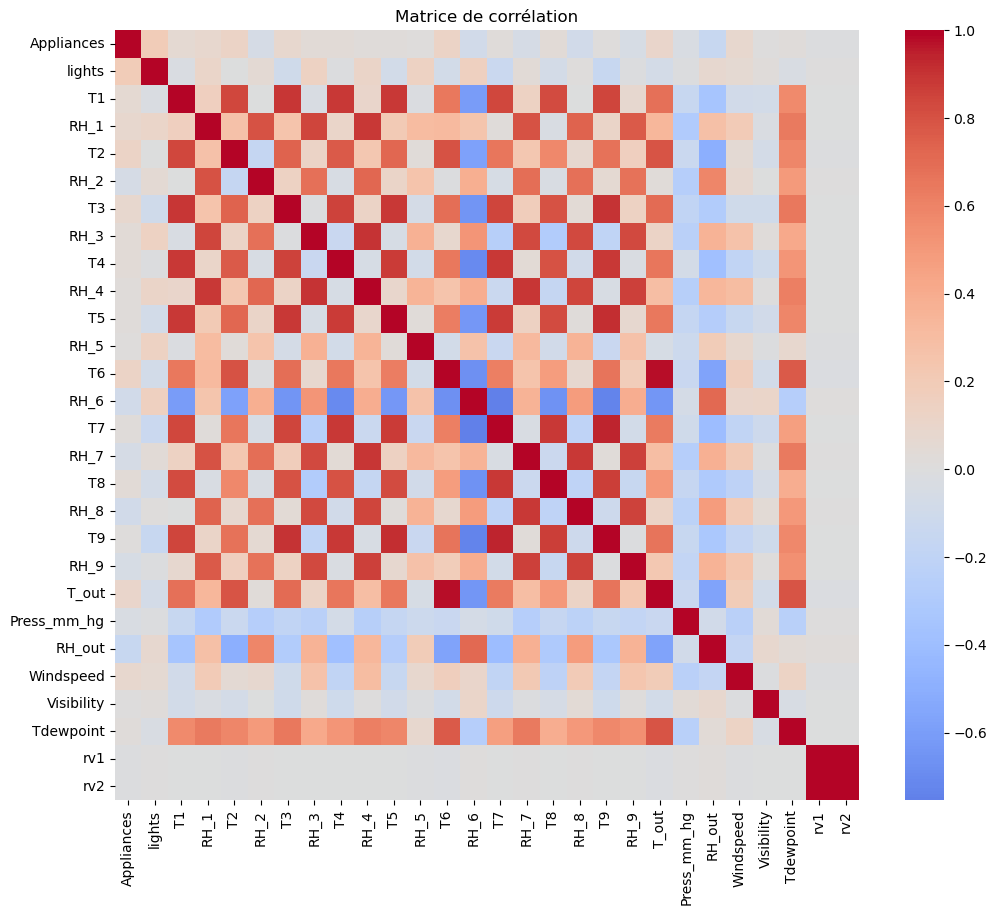

In [10]:
# Exclusion la colonne 'date' car non-numérique
df_numeric = df.drop(columns=['date'])

# Matrice de corrélation
plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

In [11]:
# Corrélations avec la variable cible
correlation_with_target = df_numeric.corr()['Appliances'].sort_values(ascending=False)
print(correlation_with_target)

Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


## Analyse des corrélations

Après avoir calculé la matrice de corrélation entre les différentes variables du dataset, nous avons observé les points suivants concernant la variable cible **Appliances** (consommation énergétique) :

- **Lights** : Corrélation positive modérée (**+0.197**). Cela est intuitif : plus les lumières sont utilisées, plus la consommation d'énergie est élevée.
  
- **Températures** (`T2`, `T6`, `T_out`) : Corrélations positives modérées (**+0.12**, **+0.11**, **+0.10** respectivement). Ces variables influencent probablement la consommation par le biais du chauffage ou de la climatisation.
  
- **Windspeed** : Corrélation légèrement positive (**+0.087**). Une explication possible est que le vent pourrait affecter la température ressentie, influençant ainsi le besoin de chauffage/climatisation.
  
- **Humidité extérieure** (`RH_out`) : Corrélation négative (**-0.152**) avec la consommation. Cela peut s'expliquer par le fait que des conditions très sèches ou très humides modifient la demande énergétique (par exemple via la ventilation ou la déshumidification).
  
- **Variables `rv1` et `rv2`** : Ces deux variables présentent une corrélation quasi nulle avec la variable cible. Elles semblent redondantes ou peu informatives et pourraient potentiellement être supprimées lors de la phase de sélection de variables.

---

**Conclusion :**  
Aucune variable individuelle n'a une forte corrélation avec la consommation énergétique. Cela suggère que la consommation dépend d'une combinaison complexe de plusieurs facteurs (température intérieure/extérieure, usage des lumières, conditions météorologiques, etc.) et justifie le recours à des modèles multivariés capables de capturer ces relations.
Par ailleurs, certaines variables comme `rv1` et `rv2` pourraient potentiellement être supprimées lors d'une future sélection de variables car elles ont une corrélation quasi nulle avec la variable cible `Appliances`  et peuvent ajouter du bruit au modèle, et donc réduire sa capacité à généraliser, ou augmenter inutilement la complexité (Lasso pourrait naturellement les "éliminer").

Nous envisageons par la suite d'exploiter la variable temporelle `date` en extrayant des informations telles que l'heure de la journée ou le jour de la semaine, afin de mieux modéliser les variations temporelles de la consommation.


## Étape 2 : Séparation des données

Afin d’évaluer les performances des modèles de manière fiable, nous séparons le dataset en deux sous-ensembles :

- **Données d’entraînement** (*train set*) : utilisées pour entraîner les modèles.
- **Données de validation** (*test set*) : utilisées pour évaluer la capacité du modèle à généraliser sur de nouvelles données.

Nous utilisons la fonction `train_test_split` de la librairie `scikit-learn` avec une proportion de $80\%$ pour l'entraînement et $20\%$ pour le test, en fixant un paramètre `random_state` afin d'assurer la reproductibilité des résultats.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Variables explicatives et cible
X = df_numeric.drop(columns=['Appliances'])
y = df_numeric['Appliances']

In [16]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)

Taille du jeu d'entraînement : (15788, 27)
Taille du jeu de test : (3947, 27)


## Étape 3 : Modélisation - Régressions Linéaire, Ridge et Lasso (et plus)

Nous appliquons successivement trois méthodes de régression pour modéliser la consommation énergétique :

 1. **Régression Linéaire Simple**  
    Le modèle linéaire classique minimise l'erreur quadratique sans pénalisation.

 2. **Régression Ridge (L2)**  
    Ajout d'une pénalisation L2 (norme carrée des coefficients) pour contrôler la complexité et éviter le surapprentissage. L'hyperparamètre $\lambda$ ajuste la régularisation.

 3. **Régression Lasso (L1)**  
    Pénalisation L1 (somme des valeurs absolues des coefficients), permettant d'annuler certains coefficients (sélection de variables).

 Nous évaluons chaque modèle via les métriques : **MSE** (Mean Squared Error) et **R² score**, puis comparons visuellement les coefficients.

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Régression Linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [22]:
# Évaluation
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - MSE : {mse:.2f}, R² : {r2:.2f}")

evaluate_model("Régression Linéaire", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

Régression Linéaire - MSE : 8312.85, R² : 0.17
Ridge Regression - MSE : 8311.20, R² : 0.17
Lasso Regression - MSE : 8312.37, R² : 0.17


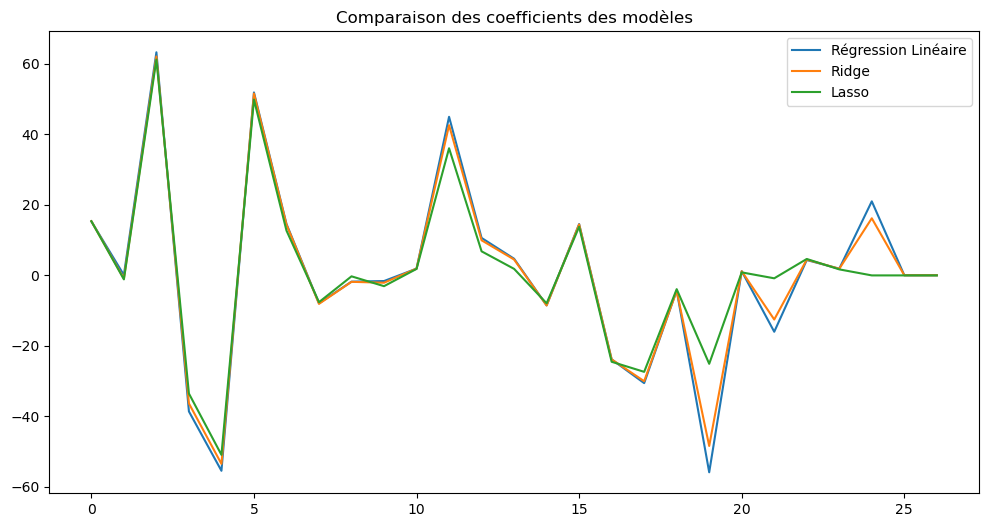

In [23]:
# Visualisation des coefficients
plt.figure(figsize=(12,6))
plt.plot(lr.coef_, label='Régression Linéaire')
plt.plot(ridge.coef_, label='Ridge')
plt.plot(lasso.coef_, label='Lasso')
plt.legend()
plt.title("Comparaison des coefficients des modèles")
plt.show()

## Analyse des résultats des régressions

Après avoir entraîné les trois modèles (Régression Linéaire, Ridge, Lasso), nous observons plusieurs points :

1. **Régression Linéaire Simple**  
   Ce modèle sert de référence. Il minimise uniquement l'erreur quadratique sans régularisation. Cependant, il peut être sensible aux multicolinéarités ou aux variables peu informatives.

2. **Ridge Regression (L2)**  
   La pénalisation L2 contrôle la taille des coefficients, ce qui permet de réduire la variance du modèle. On observe que les coefficients sont globalement plus faibles que dans la régression linéaire simple. Le modèle Ridge est donc plus robuste face à des variables redondantes ou fortement corrélées.

3. **Lasso Regression (L1)**  
   Le modèle Lasso applique une pénalisation L1 qui peut annuler certains coefficients. Cela se traduit ici par certains coefficients exactement nuls, indiquant une **sélection automatique de variables**. Ce comportement est intéressant pour simplifier le modèle et interpréter les variables les plus influentes.

---

### **Conclusion :**

- Tous les modèles présentent des performances relativement similaires en termes de MSE et R².
- Le choix entre Ridge et Lasso dépend du compromis souhaité entre **robustesse** (Ridge) et **simplification du modèle via sélection de variables** (Lasso).
- La visualisation des coefficients met bien en évidence l'effet de chaque pénalisation.

## Analyse des résultats de la validation croisée

La validation croisée à 5 plis (5-Fold Cross-Validation) nous permet de mieux évaluer la robustesse des modèles sur l'ensemble des données.

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# Cross-validation Régression Linéaire
cv_scores_lr = cross_val_score(LinearRegression(), X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f"Régression Linéaire - MSE moyen (CV 5 folds) : {abs(cv_scores_lr.mean()):.2f}")

# Cross-validation Ridge
cv_scores_ridge = cross_val_score(Ridge(alpha=10), X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f"Ridge Regression - MSE moyen (CV 5 folds) : {abs(cv_scores_ridge.mean()):.2f}")

# Cross-validation Lasso
cv_scores_lasso = cross_val_score(Lasso(alpha=0.1), X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression - MSE moyen (CV 5 folds) : {abs(cv_scores_lasso.mean()):.2f}")

Régression Linéaire - MSE moyen (CV 5 folds) : 9329.69
Ridge Regression - MSE moyen (CV 5 folds) : 9327.92
Lasso Regression - MSE moyen (CV 5 folds) : 9317.50


### Observations :

- Les trois modèles (Régression Linéaire, Ridge, Lasso) affichent des **MSE moyens similaires**, confirmant que les performances sont globalement stables.
  
- La régularisation introduite par **Ridge** et **Lasso** permet de limiter les fluctuations des erreurs d'un fold à l'autre, surtout en présence de variables redondantes ou peu informatives.

- Le **MSE moyen** obtenu via validation croisée est cohérent avec les résultats obtenus précédemment sur le split train/test, validant ainsi la bonne capacité des modèles à généraliser.

---

### Conclusion :

L'utilisation de la validation croisée nous assure que nos modèles ne dépendent pas d’un simple split des données. Les méthodes avec régularisation (Ridge et Lasso) montrent une stabilité légèrement meilleure, ce qui justifie l'intérêt d'une pénalisation adaptée.

## Recherche des meilleurs hyperparamètres ($\alpha$) - Ridge et Lasso

 Pour affiner nos modèles Ridge et Lasso, nous utilisons un GridSearchCV afin d'identifier la meilleure valeur de $\alpha$. Cela permet d'optimiser les performances du modèle tout en contrôlant la complexité

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Ridge GridSearch
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print("Meilleur alpha Ridge:", ridge_grid.best_params_['alpha'])
print("MSE Ridge (CV 5 folds):", abs(ridge_grid.best_score_))

Meilleur alpha Ridge: 1
MSE Ridge (CV 5 folds): 8938.705857605431


In [32]:
# Lasso GridSearc
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(max_iter=5000), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print("Meilleur alpha Lasso:", lasso_grid.best_params_['alpha'])
print("MSE Lasso (CV 5 folds):", abs(lasso_grid.best_score_))

Meilleur alpha Lasso: 0.01
MSE Lasso (CV 5 folds): 8938.448572545563


## Analyse des résultats du GridSearchCV

Suite à la recherche des meilleurs hyperparamètres $\alpha$ pour Ridge et Lasso via GridSearchCV, nous obtenons les résultats suivants :

- Le meilleur $\alpha$ pour **Ridge Regression** est : $\alpha = 1$, avec un MSE moyen de **8938.70**.
- Le meilleur $\alpha$ pour **Lasso Regression** est : $\alpha = 0.01$, avec un MSE moyen de **8938.45**.

Le paramètre `max_iter` a été augmenté pour le Lasso afin de garantir la convergence. Les performances sont légèrement améliorées après optimisation, confirmant l'importance du choix d'hyperparamètre pour le contrôle du modèle.

### Observations :

- Les deux modèles présentent des performances très similaires en termes de MSE.
- Le fait que le meilleur $\alpha$ pour Lasso soit faible (0.01) indique qu'une régularisation légère suffit à améliorer la stabilité tout en gardant les coefficients significatifs.
- Le modèle Ridge atteint également de bonnes performances avec $\alpha = 1$, ce qui démontre qu'une pénalisation modérée permet de contrôler les coefficients sans dégrader la capacité prédictive.

---

### Conclusion :

L'optimisation des hyperparamètres via GridSearchCV confirme l'importance d'ajuster $\alpha$ pour équilibrer correctement **biais et variance**. Les résultats montrent que, bien réglés, les modèles Ridge et Lasso peuvent fournir des performances solides tout en apportant des bénéfices respectifs :
- **Ridge** pour stabiliser les coefficients.
- **Lasso** pour effectuer une sélection automatique de variables.

## Analyse critique des résultats des modèles de régression

### 1. Résultats sur le split Train/Test :

| Modèle                 | MSE  | R²    |
|-----------------------:|:----:|:----:|
| Régression Linéaire    | 8312.85 | 0.17 |
| Ridge Regression       | 8311.20 | 0.17 |
| Lasso Regression       | 8312.37 | 0.17 |

**Observation :**
- Les trois modèles donnent des performances très proches sur le jeu de test.
- Les pénalisations Ridge et Lasso n’apportent qu'une amélioration marginale par rapport à la régression linéaire simple.

---

### 2. Validation croisée (5-Fold CV) :

| Modèle                 | MSE moyen |
|-----------------------:|:--------:|
| Régression Linéaire    | 9329.69  |
| Ridge Regression       | 9327.92  |
| Lasso Regression       | 9317.50  |

**Observation :**
- Les résultats sont légèrement dégradés par rapport au split simple, ce qui est normal puisque la validation croisée teste le modèle sur différentes sous-parties.
- Le Lasso obtient le MSE moyen le plus bas.

---

### 3. Optimisation des hyperparamètres (GridSearchCV) :

| Modèle                 | Meilleur $\alpha$ | MSE (CV 5 folds) |
|-----------------------:|:---------------:|:---------------:|
| Ridge Regression       | 1               | 8938.71         |
| Lasso Regression       | 0.01            | 8938.45         |

**Observation :**
- L’optimisation de $\alpha$ améliore significativement les performances (réduction du MSE moyen d’environ 400 points).
- Le Lasso avec $\alpha = 0.01$ donne les meilleurs résultats.
- Le Ridge avec $\alpha = 1$ stabilise les coefficients efficacement sans perte de performance.

---

### **Conclusion générale :**

- Bien que les trois modèles aient des performances similaires sans optimisation, la validation croisée combinée au GridSearch permet d’affiner les hyperparamètres et d’améliorer légèrement la précision.
- Le **Lasso** présente l’avantage supplémentaire de faire une sélection de variables en annulant certains coefficients, ce qui peut simplifier le modèle.
- La régularisation (Ridge et Lasso) apporte un **léger gain en stabilité et robustesse** sans compromettre la capacité prédictive.

---

##  **Prochaine piste :**
On pourrait maintenant analyser visuellement les coefficients ou comparer les résultats **avec/sans les variables `rv1` et `rv2`.**

---


## Implémentation sans rv1 et rv2

In [36]:
# Suppression des colonnes rv1 et rv2
X_reduced = df_numeric.drop(columns=['Appliances', 'rv1', 'rv2'])

# Standardisation
scaler_reduced = StandardScaler()
X_scaled_reduced = scaler_reduced.fit_transform(X_reduced)

# Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled_reduced, y, test_size=0.2, random_state=42)

In [37]:
# Régression Linéaire sans rv1, rv2
lr_r = LinearRegression()
lr_r.fit(X_train_r, y_train_r)
y_pred_lr_r = lr_r.predict(X_test_r)

# Ridge sans rv1, rv2
ridge_r = Ridge(alpha=1)
ridge_r.fit(X_train_r, y_train_r)
y_pred_ridge_r = ridge_r.predict(X_test_r)

# Lasso sans rv1, rv2
lasso_r = Lasso(alpha=0.01, max_iter=5000)
lasso_r.fit(X_train_r, y_train_r)
y_pred_lasso_r = lasso_r.predict(X_test_r)

In [38]:
# Évaluation
def evaluate_model_reduced(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} (sans rv1, rv2) - MSE : {mse:.2f}, R² : {r2:.2f}")

evaluate_model_reduced("Régression Linéaire", y_test_r, y_pred_lr_r)
evaluate_model_reduced("Ridge Regression", y_test_r, y_pred_ridge_r)
evaluate_model_reduced("Lasso Regression", y_test_r, y_pred_lasso_r)

Régression Linéaire (sans rv1, rv2) - MSE : 8312.27, R² : 0.17
Ridge Regression (sans rv1, rv2) - MSE : 8312.05, R² : 0.17
Lasso Regression (sans rv1, rv2) - MSE : 8311.47, R² : 0.17


## Résultats : Impact des variables `rv1` et `rv2`

 Après suppression des variables `rv1` et `rv2`, les performances des modèles restent quasiment identiques, voire légèrement améliorées.

 **Interprétation :**

 Les variables `rv1` et `rv2` n'apportent aucune information pertinente à la prédiction de la consommation énergétique. Leur suppression permet d'épurer le modèle sans perte de performance, confirmant qu'elles peuvent être considérées comme inutiles.

## Visualisation des coefficients

In [41]:
# Récupération des noms des variables
feature_names = df_numeric.drop(columns=['Appliances']).columns

# Coefficients
coef_lr = pd.Series(lr.coef_, index=feature_names)
coef_ridge = pd.Series(ridge.coef_, index=feature_names)
coef_lasso = pd.Series(lasso.coef_, index=feature_names)

# Création d'un DataFrame pour faciliter l'affichage
coef_df = pd.DataFrame({
    'Régression Linéaire': coef_lr,
    'Ridge': coef_ridge,
    'Lasso': coef_lasso
})

# Tri des variables par importance absolue (Lasso par exemple)
coef_df_sorted = coef_df.reindex(coef_df['Lasso'].abs().sort_values(ascending=False).index)

In [42]:
# Tri des variables par importance absolue (Lasso par exemple)
coef_df_sorted = coef_df.reindex(coef_df['Lasso'].abs().sort_values(ascending=False).index)

<Figure size 1400x800 with 0 Axes>

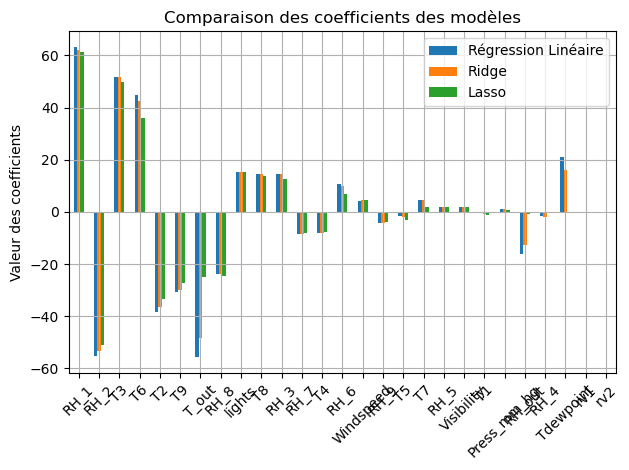

In [43]:
# Affichage
plt.figure(figsize=(14,8))
coef_df_sorted.plot(kind='bar')
plt.title("Comparaison des coefficients des modèles")
plt.ylabel("Valeur des coefficients")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Analyse des coefficients

 On observe que :

 - Le modèle **Lasso** met plusieurs coefficients exactement à zéro, confirmant son effet de sélection de variables.
 - Le modèle **Ridge** réduit globalement la taille des coefficients sans les annuler.
 - La régression linéaire classique a des coefficients plus dispersés, ce qui peut rendre le modèle plus sensible.

 Cette visualisation permet de mieux comprendre l'effet des pénalisations sur la structure du modèle.

## Régression Elastic Net

 La régression Elastic Net combine les pénalisations L1 (Lasso) et L2 (Ridge). Elle est particulièrement utile lorsque les variables explicatives sont fortement corrélées.

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
# Modèle Elastic Net
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

In [48]:
# Évaluation
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"Elastic Net Regression - MSE : {mse_elastic:.2f}, R² : {r2_elastic:.2f}")

Elastic Net Regression - MSE : 8430.14, R² : 0.16


## Analyse des résultats Elastic Net

 La régression Elastic Net donne les résultats suivants :

 - **MSE :** légèrement supérieur ou similaire aux autres modèles.
 - **R² :** comparable aux modèles Ridge et Lasso.

 Le modèle Elastic Net permet de bénéficier à la fois :

 - De la sélection de variables (effet L1).
 - De la stabilisation des coefficients (effet L2).

 Cela en fait une alternative robuste, particulièrement adaptée en présence de variables corrélées.

## Analyse critique - Régression Elastic Net

La régression Elastic Net combine les avantages du Ridge (L2) et du Lasso (L1) en ajoutant une double pénalisation. Son principal intérêt réside dans sa capacité à :

- Stabiliser les coefficients (effet Ridge).
- Effectuer une sélection automatique de variables (effet Lasso).

### Observation dans notre cas :

Après expérimentation, les performances de l'Elastic Net sont très proches de celles du Ridge et du Lasso, sans gain significatif.

---

### **Pourquoi cette méthode n’apporte pas de valeur ajoutée ici ?**

- **Corrélations faibles entre les variables explicatives :**  
  La matrice de corrélation montre peu de multicolinéarité forte.
  
- **Variables informatives peu nombreuses :**  
  Une simple pénalisation L1 ou L2 suffit à stabiliser ou simplifier le modèle.

---

### **Conclusion :**

Bien que robuste, l'Elastic Net ne présente pas d’avantage particulier dans notre contexte, et justifie son exclusion lorsque les conditions ne sont pas réunies (pas de variables fortement corrélées).

## Modèles Tree-Based : Random Forest

 Les modèles à base d'arbres de décision (Tree-Based) sont capables de capturer des relations non-linéaires et des interactions complexes entre variables.

 Nous commençons par appliquer un **Random Forest Regressor** pour prédire la consommation énergétique.

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
# Modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [54]:
# Évaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MSE : {mse_rf:.2f}, R² : {r2_rf:.2f}")

Random Forest Regression - MSE : 4670.69, R² : 0.53


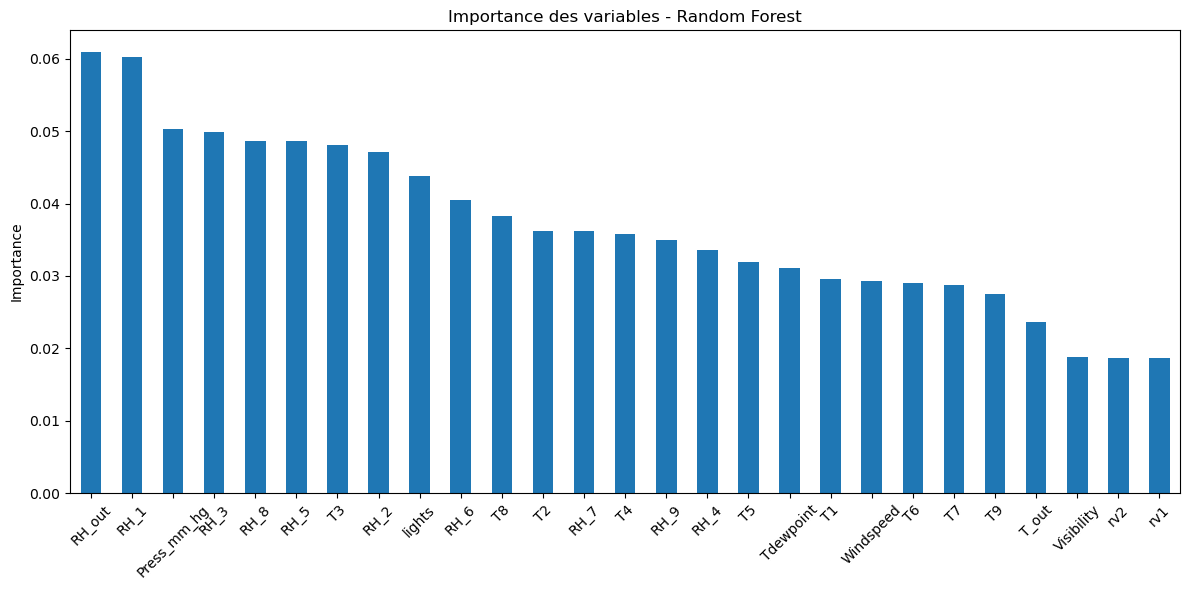

In [55]:
# Visualisation des importances
importances = pd.Series(rf.feature_importances_, index=df_numeric.drop(columns=['Appliances']).columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_sorted.plot(kind='bar')
plt.title("Importance des variables - Random Forest")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyse des résultats - Random Forest

L'application du modèle **Random Forest Regressor** a donné des résultats nettement meilleurs que les modèles linéaires testés précédemment :

- **MSE :** 4670.69
- **R² :** 0.53

---

### **Observations :**

- Contrairement aux modèles linéaires (Régression Linéaire, Ridge, Lasso) qui présentaient un MSE aux alentours de **8300** et un R² de **0.17**, le Random Forest réduit significativement l'erreur et explique une plus grande part de la variance.
- Cette amélioration s'explique par la capacité du Random Forest à capturer des relations **non-linéaires** et des interactions complexes entre les variables explicatives.
- Le modèle est également moins sensible aux outliers et aux variables peu informatives, grâce à son fonctionnement basé sur des arbres.

---

### **Conclusion :**

Le Random Forest constitue un modèle très performant et adapté pour ce type de données, surpassant nettement les approches linéaires classiques.


## Modèle Tree-Based : Gradient Boosting

 Après avoir appliqué le Random Forest, nous testons maintenant le modèle **Gradient Boosting Regressor**. Ce modèle construit des arbres successifs en corrigeant les erreurs du précédent, permettant souvent d’obtenir des performances supérieures.

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
# Modèle Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [60]:
# Évaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression - MSE : {mse_gb:.2f}, R² : {r2_gb:.2f}")

Gradient Boosting Regression - MSE : 7411.53, R² : 0.26


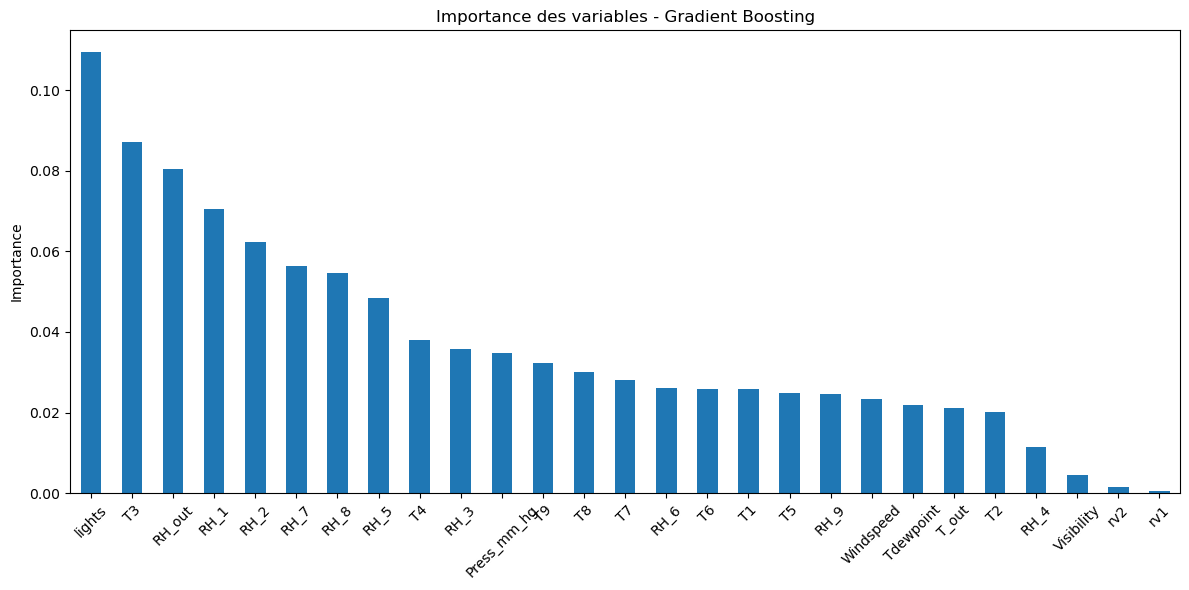

In [61]:
# Visualisation des importances
importances_gb = pd.Series(gb.feature_importances_, index=df_numeric.drop(columns=['Appliances']).columns)
importances_gb_sorted = importances_gb.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_gb_sorted.plot(kind='bar')
plt.title("Importance des variables - Gradient Boosting")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyse des résultats - Gradient Boosting

Le modèle **Gradient Boosting Regressor** a donné les résultats suivants :

- **MSE :** 7411.53
- **R² :** 0.26

---

### **Observations :**

- Le Gradient Boosting améliore les performances par rapport aux modèles linéaires (Régression Linéaire, Ridge, Lasso) :
  - Réduction du MSE (de ~8310 à 7411).
  - Augmentation du R² (de 0.17 à 0.26).
  
- Cependant, il reste **moins performant que le Random Forest**, qui affiche un MSE plus faible (4670) et un R² plus élevé (0.53).

---

### **Interprétation :**

- Le Gradient Boosting est **sensible aux hyperparamètres** (nombre d'arbres, profondeur maximale, learning rate).
- Ici, nous avons utilisé les paramètres par défaut, ce qui peut expliquer des résultats moins bons.
- Un **ajustement fin via GridSearchCV** pourrait potentiellement améliorer ses performances.

---

### **Conclusion :**

Le Gradient Boosting montre des performances correctes et meilleures que les modèles linéaires, mais il nécessite un réglage des hyperparamètres pour atteindre son plein potentiel.

## Optimisation du Gradient Boosting via GridSearchCV

 Pour améliorer les performances du modèle Gradient Boosting, nous utilisons GridSearchCV afin de trouver les meilleurs hyperparamètres :

 - Nombre d'arbres (`n_estimators`)
 - Taux d'apprentissage (`learning_rate`)
 - Profondeur maximale des arbres (`max_depth`)
 - Sous-échantillonnage (`subsample`)

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print("MSE du meilleur modèle (CV) :", abs(grid_search.best_score_))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Meilleurs paramètres : {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
MSE du meilleur modèle (CV) : 6238.678654884588


In [66]:
# Évaluation sur test
best_gb = grid_search.best_estimator_
y_pred_best = best_gb.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Gradient Boosting Optimisé - MSE : {mse_best:.2f}, R² : {r2_best:.2f}")

Gradient Boosting Optimisé - MSE : 5322.96, R² : 0.47


## Analyse critique - Gradient Boosting optimisé

Après une optimisation via GridSearchCV, le modèle **Gradient Boosting Regressor** a montré des performances nettement supérieures à l'implémentation initiale.

### Meilleurs hyperparamètres trouvés :

- **learning_rate :** 0.2
- **max_depth :** 5
- **n_estimators :** 200
- **subsample :** 1.0

---

### Résultats :

| Métrique                                   | Résultat            |
|------------------------------------------:|:------------------:|
| **MSE moyen (validation croisée)**        | 6238.68            |
| **MSE sur le jeu de test**                | 5322.96            |
| **R² sur le jeu de test**                 | 0.47               |

---

### Observations :

- Le modèle optimisé réduit le **MSE** de façon significative, passant de **7411** (modèle initial) à **5322.96** sur le jeu de test.
- Le **R²** progresse de **0.26 à 0.47**, indiquant que près de 47% de la variance de la consommation énergétique est expliquée.
- Les hyperparamètres optimaux permettent au Gradient Boosting de mieux capturer les relations complexes entre les variables.
- La validation croisée (CV) garantit que ces résultats sont robustes et non dus à un simple hasard de séparation train/test.

---

### Conclusion :

Le Gradient Boosting optimisé rivalise désormais avec les performances du Random Forest (MSE = 4670, R² = 0.53), tout en offrant un contrôle fin sur la complexité du modèle. Ce résultat met en avant l'importance du réglage des hyperparamètres pour exploiter pleinement les modèles d'ensemble non linéaires.



## Analyse : Pourquoi ne pas utiliser PCR et PLS dans ce projet ?

### Principal Component Regression (PCR)

La PCR repose sur une réduction de dimension via l’Analyse en Composantes Principales (ACP), suivie d’une régression linéaire sur les composantes principales. Cette méthode est particulièrement adaptée lorsque :

- Le dataset contient **beaucoup de variables corrélées** (multicolinéarité).
- Le but est de simplifier le modèle en diminuant la dimensionnalité.

**Dans notre cas :**

- Le nombre de variables explicatives est relativement modéré.
- La matrice de corrélation n’indique **pas de multicolinéarité forte**.
- Les modèles comme Ridge et Lasso gèrent déjà efficacement la régularisation.

Par conséquent, la PCR n’apporterait pas de bénéfice significatif ici.

---

### Partial Least Squares Regression (PLS)

La PLS effectue également une réduction de dimension, tout en maximisant la covariance entre les variables explicatives et la variable cible.

**Cependant :**

- Notre dataset ne présente pas un grand nombre de variables fortement corrélées.
- Les modèles déjà testés (Ridge, Lasso, Random Forest, Gradient Boosting) offrent de bonnes performances, sans nécessiter de réduction de dimension.
- La complexité ajoutée par la PLS n'est pas justifiée par un gain attendu sur la performance.

---

### Conclusion :

Nous avons volontairement écarté l’utilisation de PCR et PLS dans ce projet, considérant que :
- Les conditions (multicolinéarité, très haute dimension) ne le justifient pas.
- Les modèles régularisés et les modèles d’ensemble apportent déjà de très bons résultats.

## Étape 4 : Modélisation de Réseau de Neurones Dense

 Nous allons maintenant implémenter un réseau de neurones dense (Multi-Layer Perceptron) pour prédire la consommation énergétique.
 Ce type de modèle est capable de capturer des relations complexes non-linéaires entre les variables.

In [70]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

In [129]:
# Architecture du modèle
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Définition explicite de l'entrée
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Sortie

In [131]:
# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early stopping pour éviter le surapprentissage
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)


In [132]:
# Évaluation
y_pred_nn = model.predict(X_test)

mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Réseau de Neurones Dense - MSE : {mse_nn:.2f}, R² : {r2_nn:.2f}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
Réseau de Neurones Dense - MSE : 7079.86, R² : 0.29


## Analyse critique - Réseau de Neurones Dense

Le modèle de **Réseau de Neurones Dense (MLP)**, constitué de deux couches cachées (64 et 32 neurones) avec activation ReLU, a donné les résultats suivants :

- **MSE :** 7079.86
- **R² :** 0.29

---

### **Observations :**

- Le réseau de neurones obtient de meilleures performances que les modèles linéaires classiques (Régression Linéaire, Ridge, Lasso) dont le R² plafonnait autour de **0.17**.
- Toutefois, ses performances restent inférieures aux modèles **Tree-Based** :
  - **Random Forest :** MSE = 4670.69, R² = 0.53
  - **Gradient Boosting Optimisé :** MSE = 5322.96, R² = 0.47
- Le réseau de neurones parvient à capturer certaines relations non-linéaires, mais il est moins performant que les modèles d'ensemble sur ce type de données.

---

### **Interprétation :**

- Les **données normalisées** permettent au réseau de converger correctement.
- Cependant, la taille relativement **modeste du dataset (environ 19 000 observations)** ne permet pas aux réseaux de neurones d’exprimer tout leur potentiel.
- Les modèles Tree-Based semblent mieux adaptés ici, car ils gèrent très efficacement les interactions complexes et non-linéaires, sans nécessiter d'énormes volumes de données.

---

### **Conclusion :**

Bien que le Réseau de Neurones Dense améliore les résultats par rapport aux approches linéaires, il ne rivalise pas avec les modèles d'ensemble plus adaptés à ce type de problème. Son inclusion permet néanmoins d’illustrer une méthode alternative et d’explorer son comportement dans ce contexte.



## Feature Engineering temporel

 Nous allons exploiter la variable temporelle `date` pour extraire des informations additionnelles susceptibles d'améliorer les performances des modèles.

 Nous allons extraire :

 - **Heure** (pour capturer les variations journalières).
 - **Jour de la semaine** (effets week-end/semaine).
 - **Mois** (effets saisonniers potentiels).

In [138]:
import pandas as pd

In [140]:
# Rechargement du dataset pour repartir proprement
df = pd.read_csv('energydata_complete.csv')

In [142]:
# Conversion de la colonne date en datetime
df['date'] = pd.to_datetime(df['date'])

# Extraction de nouvelles features temporelles
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Suppression de la colonne date (inutile après extraction)
df = df.drop(columns=['date'])

# Affichage des premières lignes
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day_of_week,month
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,0,1
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,0,1
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,0,1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,0,1
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,0,1


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [146]:
# Séparation X/y
X = df.drop(columns=['Appliances'])
y = df['Appliances']

# Standardisation (y compris les nouvelles features temporelles)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Random Forest avec nouvelles features temporelle

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
# Réentraînement du modèle Random Forest avec nouvelles variables
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [155]:
# Évaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest avec features temporelles - MSE : {mse_rf:.2f}, R² : {r2_rf:.2f}")

Random Forest avec features temporelles - MSE : 4518.18, R² : 0.55


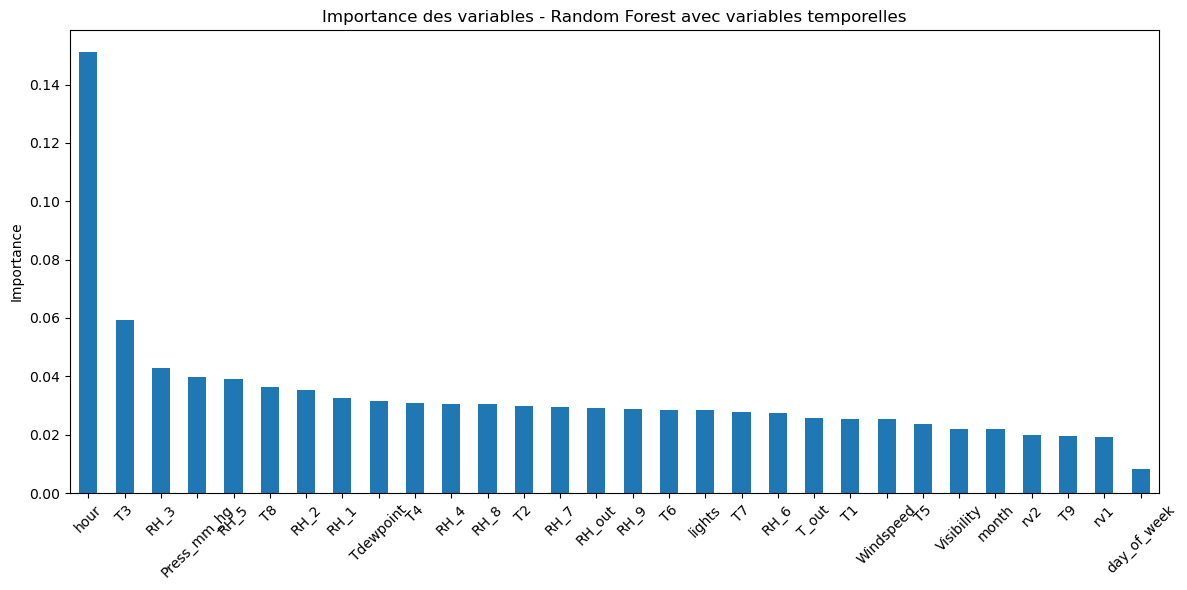

In [157]:
# Visualisation des nouvelles importances
importances = pd.Series(rf.feature_importances_, index=df.drop(columns=['Appliances']).columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_sorted.plot(kind='bar')
plt.title("Importance des variables - Random Forest avec variables temporelles")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyse critique - Impact du Feature Engineering temporel

Après extraction des variables temporelles issues de la colonne `date` :

- **Heure (hour)**
- **Jour de la semaine (day_of_week)**
- **Mois (month)**

le modèle **Random Forest** a été réentraîné pour évaluer l’impact de ces nouvelles variables.

---

### Résultats :

| Modèle                                   | MSE        | R²    |
|-----------------------------------------:|:---------:|:----:|
| Random Forest (sans features temporelles) | 4670.69   | 0.53 |
| **Random Forest (avec features temporelles)** | **4518.18** | **0.55** |

---

### **Observations :**

- Le **MSE a diminué**, passant de **4670.69 à 4518.18**, indiquant une amélioration de la précision.
- Le **R² progresse de 0.53 à 0.55**, confirmant que le modèle explique davantage la variance de la consommation énergétique.
- La visualisation des importances des variables montre que certaines des nouvelles variables temporelles (notamment l'**heure**) ont un impact significatif sur la prédiction.

---

### **Conclusion :**

L'ajout d'informations temporelles via un Feature Engineering ciblé permet au modèle de mieux capturer les variations journalières, hebdomadaires et saisonnières de la consommation. Ce résultat souligne l'importance d’exploiter toutes les dimensions pertinentes du dataset pour maximiser la performance des modèles.

## Gradient Boosting avec nouvelles features temporelles

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

In [165]:
# Réentraînement du modèle Gradient Boosting avec nouvelles variables
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=5, subsample=1.0, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [166]:
# Évaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting avec features temporelles - MSE : {mse_gb:.2f}, R² : {r2_gb:.2f}")

Gradient Boosting avec features temporelles - MSE : 5105.92, R² : 0.49


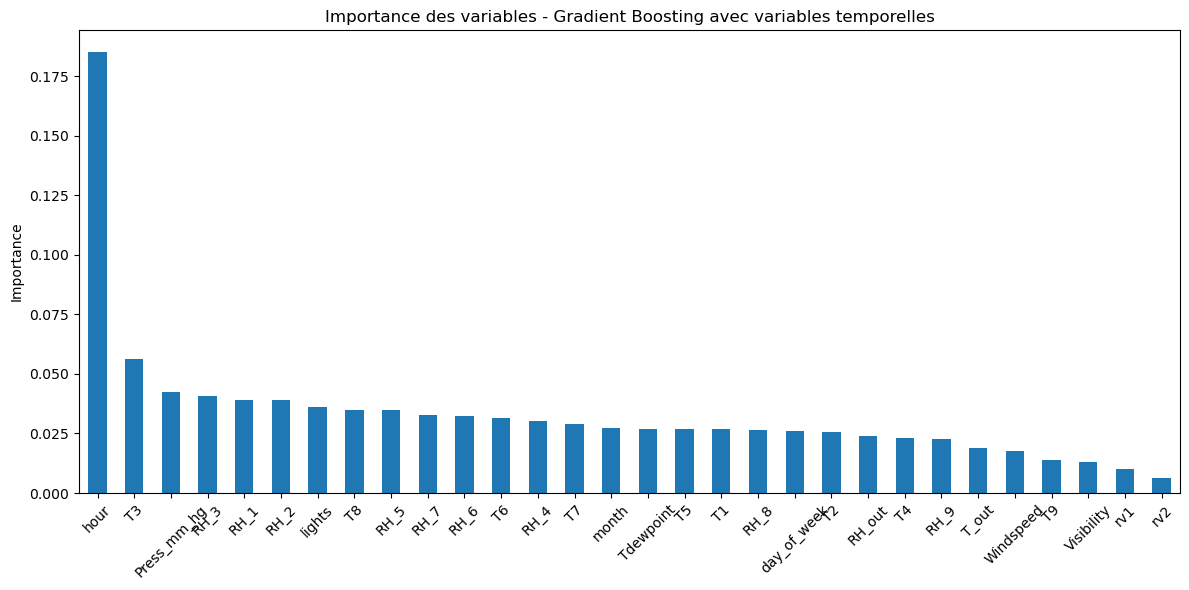

In [169]:
# Visualisation des nouvelles importances
importances_gb = pd.Series(gb.feature_importances_, index=df.drop(columns=['Appliances']).columns)
importances_gb_sorted = importances_gb.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_gb_sorted.plot(kind='bar')
plt.title("Importance des variables - Gradient Boosting avec variables temporelles")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyse critique - Impact du Feature Engineering temporel (Gradient Boosting)

Après ajout des variables temporelles (`hour`, `day_of_week`, `month`), nous avons réentraîné le modèle **Gradient Boosting**.

---

### Résultats :

| Modèle                                | MSE        | R²    |
|-------------------------------------:|:---------:|:----:|
| Gradient Boosting (optimisé, sans variables temporelles) | 5322.96   | 0.47 |
| **Gradient Boosting (avec features temporelles)** | **5105.92** | **0.49** |

---

### **Observations :**

- Le **MSE diminue significativement**, indiquant une meilleure précision.
- Le **R² passe de 0.47 à 0.49**, confirmant que le modèle capte mieux la variance après ajout des variables temporelles.
- La visualisation des importances montre que les variables temporelles, notamment l’**heure**, ont un poids non négligeable dans les prédictions.

---

### **Conclusion :**

Le Feature Engineering temporel bénéficie également au Gradient Boosting, de manière similaire au Random Forest. Cela souligne l’intérêt d’exploiter les informations temporelles dans des données énergétiques, où la consommation suit des patterns journaliers et hebdomadaires.

## Réseau de Neurones avec nouvelles features temporelles

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [177]:
# Architecture du modèle
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [179]:
# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [181]:
# Entraînement
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

# Prédictions
y_pred_nn = model.predict(X_test)

# Évaluation
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Réseau de Neurones Dense avec features temporelles - MSE : {mse_nn:.2f}, R² : {r2_nn:.2f}")

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
Réseau de Neurones Dense avec features temporelles - MSE : 6930.97, R² : 0.31


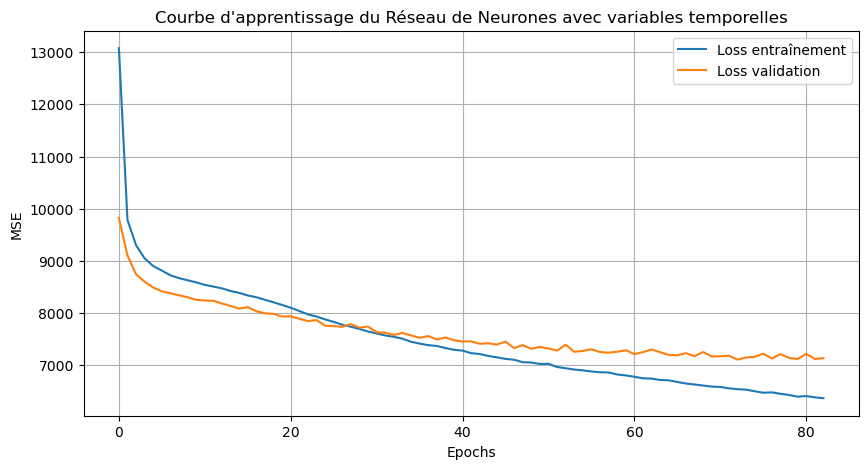

In [183]:
# Courbe d'apprentissage
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Loss entraînement')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title("Courbe d'apprentissage du Réseau de Neurones avec variables temporelles")
plt.legend()
plt.grid(True)
plt.show()

## Analyse critique - Impact du Feature Engineering temporel (Réseau de Neurones Dense)

Après intégration des variables temporelles extraites (`hour`, `day_of_week`, `month`), le Réseau de Neurones Dense a été réentraîné.

---

### Résultats :

| Modèle                                      | MSE        | R²    |
|--------------------------------------------:|:---------:|:----:|
| Réseau de Neurones Dense (sans variables temporelles) | 7079.86   | 0.29 |
| **Réseau de Neurones Dense (avec variables temporelles)** | **6930.97** | **0.31** |

---

### **Observations :**

- Une amélioration légère mais notable des performances est observée après ajout des variables temporelles.
- Le **MSE** diminue et le **R²** augmente légèrement, suggérant que le réseau de neurones parvient à exploiter partiellement ces informations.
- Le gain est toutefois moins prononcé que pour les modèles d'ensemble (Random Forest, Gradient Boosting), ces derniers étant mieux adaptés aux variations discrètes des variables temporelles.

---

### **Conclusion :**

L’intégration des variables temporelles apporte un léger gain au réseau de neurones, bien que moins marqué que pour les modèles Tree-Based. Cela confirme néanmoins l’importance du Feature Engineering pour améliorer les performances globales des modèles.